In [1]:
%matplotlib inline

In [158]:
import pandas as pd
import numpy as np
import os
import csv
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
csv_file = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")

In [4]:
csv_file

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [5]:
del csv_file['Unnamed: 0']

In [6]:
csv_file

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [7]:
csv_file.dtypes

ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

In [8]:
csv_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
ID                 16744 non-null int64
Title              16744 non-null object
Year               16744 non-null int64
Age                7354 non-null object
IMDb               16173 non-null float64
Rotten Tomatoes    5158 non-null object
Netflix            16744 non-null int64
Hulu               16744 non-null int64
Prime Video        16744 non-null int64
Disney+            16744 non-null int64
Type               16744 non-null int64
Directors          16018 non-null object
Genres             16469 non-null object
Country            16309 non-null object
Language           16145 non-null object
Runtime            16152 non-null float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.0+ MB


In [9]:
csv_file.describe()

,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


In [10]:
csv_file.isnull().any()

ID                 False
Title              False
Year               False
Age                 True
IMDb                True
Rotten Tomatoes     True
Netflix            False
Hulu               False
Prime Video        False
Disney+            False
Type               False
Directors           True
Genres              True
Country             True
Language            True
Runtime             True
dtype: bool

In [86]:
csv_file

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,0,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16741,The Poof Point,2001,7+,4.7,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,0,0,0,1,Neil Gelinas,Documentary,United States,English,NaN
16742,16743,Man Among Cheetahs,2017,NaN,6.6,0,0,0,1,Richard Slater-Jones,Documentary,United States,English,NaN


In [12]:
missing_value = csv_file.isnull().sum()
missing_value.sort_values(ascending = False)

Rotten Tomatoes    11586
Age                 9390
Directors            726
Language             599
Runtime              592
IMDb                 571
Country              435
Genres               275
Type                   0
Disney+                0
Prime Video            0
Hulu                   0
Netflix                0
Year                   0
Title                  0
ID                     0
dtype: int64

Rotten Tomatoes column has significant number of missing value. So, we need to drop this column.


In [13]:
del csv_file['Rotten Tomatoes']
csv_file

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16741,The Poof Point,2001,7+,4.7,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16743,Man Among Cheetahs,2017,NaN,6.6,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [14]:
len(csv_file)

16744

Removing the **Type** column, there's no need to have this column.

In [15]:
del csv_file['Type']

In [87]:
# Removing rows with missing values
cleand_file = csv_file.dropna(thresh = 2)
cleand_file

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,0,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16741,The Poof Point,2001,7+,4.7,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,0,0,0,1,Neil Gelinas,Documentary,United States,English,NaN
16742,16743,Man Among Cheetahs,2017,NaN,6.6,0,0,0,1,Richard Slater-Jones,Documentary,United States,English,NaN


In [88]:
len(cleand_file)

16744

Now we can see we removed 9698 rows.

### Total number of movies

In [90]:
total_movies = cleand_file[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].apply(pd.Series.value_counts).reset_index()

In [91]:
total_movies.columns = ['Present', 'Netflix', 'Hulu', 'Prime Video', 'Disney+']

In [92]:
total_movies

,Present,Netflix,Hulu,Prime Video,Disney+
0,0,13184,15841,4390,16180
1,1,3560,903,12354,564


In [93]:
netflix_total_movies = len(cleand_file.loc[cleand_file["Netflix"]==1])
hulu_total_movies = len(cleand_file.loc[cleand_file["Hulu"]==1])
prime_total_movies = len(cleand_file.loc[cleand_file["Prime Video"]==1])
disney_total_movies = len(cleand_file.loc[cleand_file["Disney+"]==1])

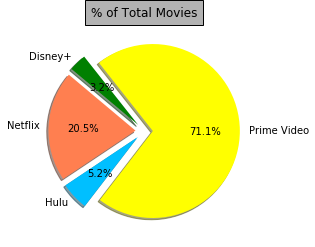

(-0.05, 1.05, -0.05, 1.05)

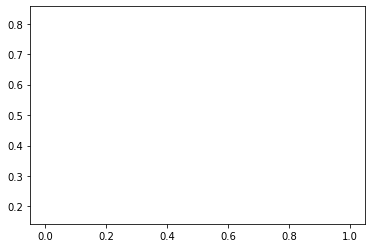

In [97]:
fares = [netflix_total_movies,hulu_total_movies,prime_total_movies,disney_total_movies]
# Build Pie Chart
labels = ["Netflix", "Hulu", "Prime Video", "Disney+"]
colors = ["coral", "deepskyblue", "yellow","green"]
explode = (0.1, 0.1, 0.1,0.1)

plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Movies",  bbox={'facecolor':'1.7', 'pad':6})
plt.savefig("PieMovies.png")
plt.show()


plt.axis("equal")

### Movies count by language

In [98]:
count_movies_language = cleand_file.groupby('Language').count()["ID"].sort_values(ascending = False).head(10)

In [99]:
count_movies_language

Language
English            10955
Hindi                503
English,Spanish      276
Spanish              267
English,French       174
Italian              166
French               163
Japanese             155
Mandarin             151
Tamil                 93
Name: ID, dtype: int64

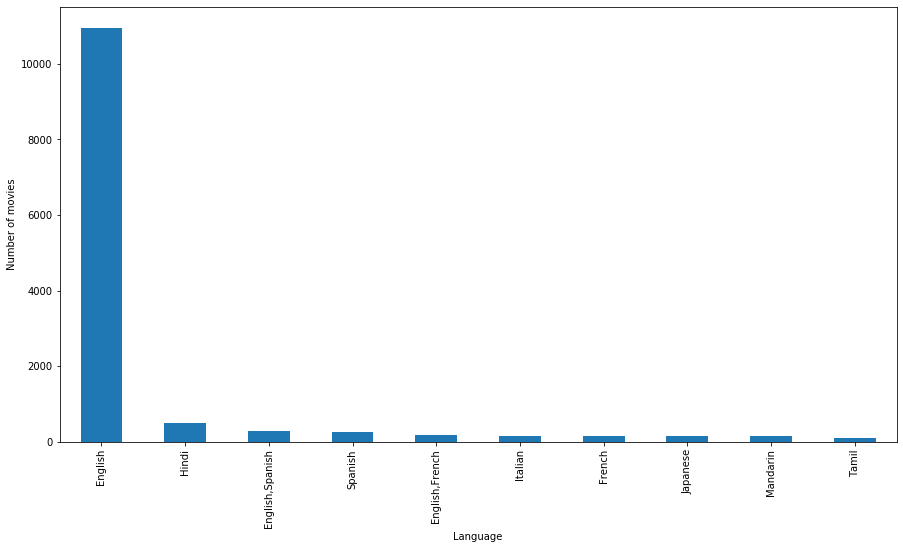

<Figure size 432x288 with 0 Axes>

In [100]:
fig, ax = plt.subplots(figsize=(15, 8))
# Create a bar chart based off of the group series from before
count_chart = count_movies_language.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Language")
count_chart.set_ylabel("Number of movies")


plt.show()
plt.tight_layout()

### Movies count by country

In [101]:
count_movies_country = cleand_file.groupby('Country').count()['ID'].sort_values(ascending= False).head(10)

In [102]:
count_movies_country

Country
United States                   8776
India                           1064
United Kingdom                   905
Canada                           555
Australia                        202
Japan                            175
United Kingdom,United States     172
France                           167
Hong Kong                        153
Canada,United States             150
Name: ID, dtype: int64

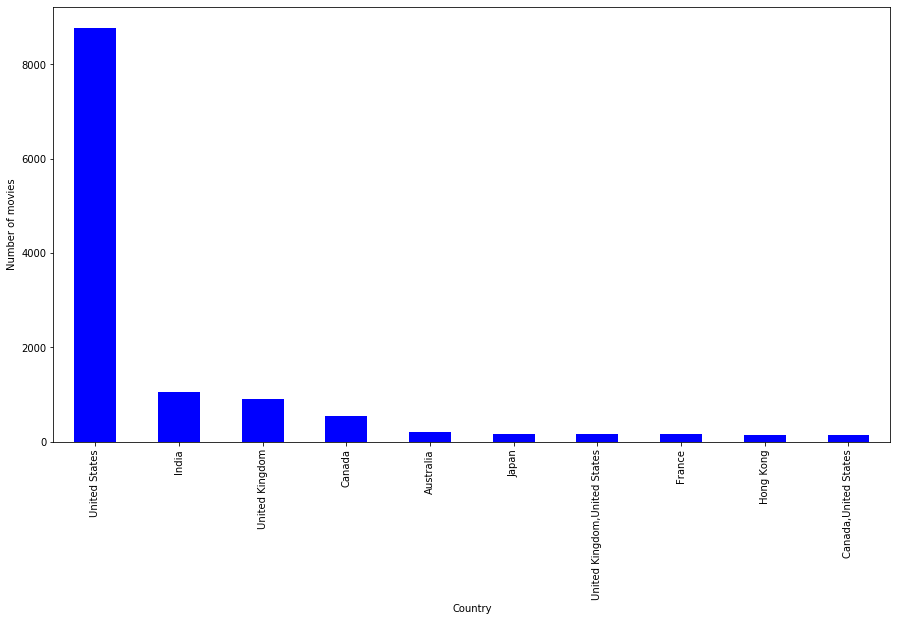

<Figure size 432x288 with 0 Axes>

In [103]:
fig, ax = plt.subplots(figsize=(15, 8))
# Create a bar chart based off of the group series from before
count_chart = count_movies_country.plot(kind='bar', color = 'Blue')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Country")
count_chart.set_ylabel("Number of movies")


plt.show()
plt.tight_layout()

### Movies count by year

In [104]:
count_movies_year = cleand_file.groupby('Year').count()["ID"]

In [105]:
count_movies_year

Year
1902       1
1912       1
1913       2
1915       4
1916       1
        ... 
2016    1206
2017    1401
2018    1285
2019     689
2020     147
Name: ID, Length: 109, dtype: int64

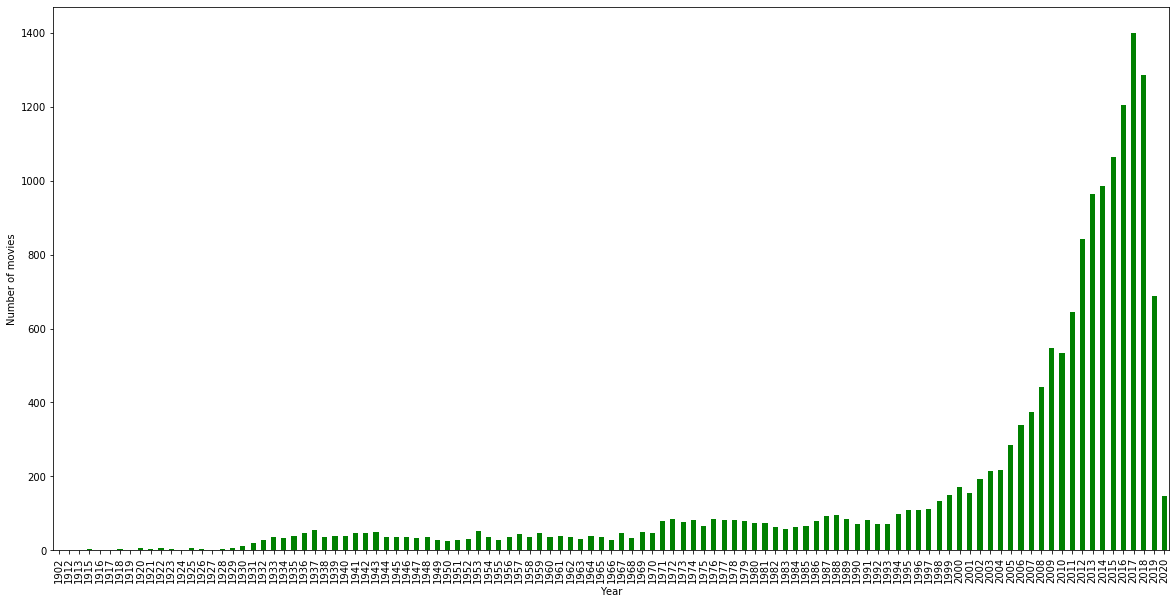

<Figure size 432x288 with 0 Axes>

In [114]:
fig, ax = plt.subplots(figsize=(20, 10))
# Create a bar chart based off of the group series from before
count_chart = count_movies_year.plot(kind='bar', color = 'Green')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Year")
count_chart.set_ylabel("Number of movies")


plt.show()
plt.tight_layout()

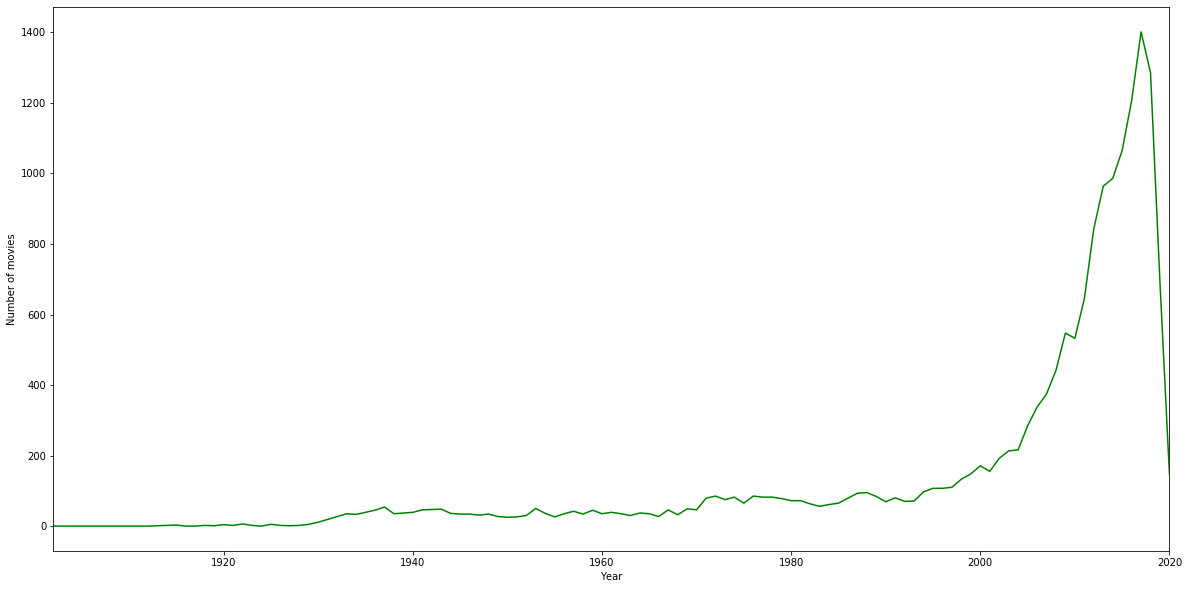

<Figure size 432x288 with 0 Axes>

In [107]:
fig, ax = plt.subplots(figsize=(20, 10))
# Create a bar chart based off of the group series from before
count_chart = count_movies_year.plot(kind='line', color = 'Green')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Year")
count_chart.set_ylabel("Number of movies")


plt.show()
plt.tight_layout()

## The longest movies

In [111]:
longest_movies = cleand_file.sort_values("Runtime",ascending = False).head(10)

In [112]:
longest_movies

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
13179,13180,Colorado,1940,all,5.9,0,0,1,0,NaN,"Action,Adventure,Drama,Romance,Western",United States,English,1256.0
4405,4406,Law of the Lawless,1964,NaN,6.1,0,1,1,0,NaN,"Action,Crime,Drama",Russia,Russian,750.0
15295,15296,The Vatican Museums,2007,NaN,5.0,0,0,1,0,Luca De Mata,NaN,Italy,English,410.0
14113,14114,The Inner Circle,2009,NaN,6.6,0,0,1,0,NaN,Drama,Sweden,Swedish,360.0
12475,12476,Scarlett,2016,16+,4.4,0,0,1,0,NaN,"Drama,Romance","France,United States,Germany,Italy,United King...",English,360.0
13115,13116,Carlos el terrorista,1980,NaN,6.1,0,0,1,0,NaN,"Biography,Crime,Drama,Thriller","France,Germany","English,Arabic,German,Spanish,French,Hungarian...",334.0
13048,13049,Custer's Last Stand,1936,NaN,4.6,0,0,1,0,Elmer Clifton,"Adventure,History,Romance,War,Western",United States,English,328.0
6245,6246,Gone,2012,13+,5.9,0,0,1,0,NaN,"Drama,Mystery",United Kingdom,English,270.0
3861,3862,Dina,2017,NaN,6.8,0,1,0,0,NaN,"Adventure,Drama,Fantasy,Sci-Fi","United States,Canada,Germany,Italy","English,Italian",265.0
5673,5674,The Greatest Story Ever Told,1965,all,6.6,0,0,1,0,"George Stevens,David Lean,Jean Negulesco","Biography,Drama,History",United States,English,260.0


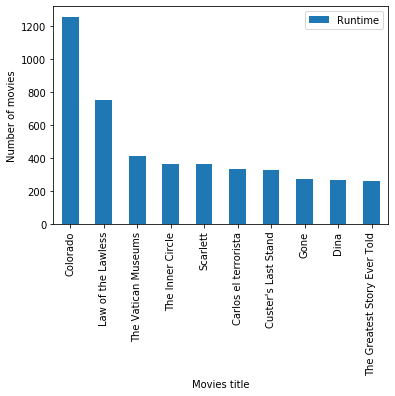

<Figure size 432x288 with 0 Axes>

In [116]:
# Create a bar chart based off of the group series from before
count_chart = longest_movies.plot(kind='bar',x = "Title", y= "Runtime")

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Movies title")
count_chart.set_ylabel("Number of movies")


plt.show()
plt.tight_layout()

### Top movies rating by IMDB

In [123]:
top_IMDB_rating = cleand_file.sort_values('IMDb', ascending = False).head(20)

In [124]:
top_IMDB_rating

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
1292,1293,My Next Guest with David Letterman and Shah Ru...,2019,NaN,9.3,1,0,0,0,NaN,Talk-Show,NaN,NaN,61.0
7220,7221,"Down, But Not Out!",2015,NaN,9.3,0,0,1,0,Miguel Gaudêncio,"Documentary,Sport",Poland,Polish,68.0
6566,6567,Square One,2019,NaN,9.3,0,0,1,0,Danny Wu,"Documentary,Drama,Music",United States,English,83.0
5110,5111,Love on a Leash,2011,NaN,9.3,0,0,1,0,Fen Tian,"Comedy,Drama,Fantasy,Romance",United States,NaN,90.0
6837,6838,Steven Banks: Home Entertainment Center,1989,NaN,9.3,0,0,1,0,Tom McLoughlin,Comedy,United States,English,60.0
7426,7427,Bounty,2011,NaN,9.3,0,0,1,0,Roger Donaldson,"Adventure,Drama,History,Romance","United Kingdom,United States,New Zealand",English,132.0
8458,8459,Where's Daddy?,2017,NaN,9.1,0,0,1,0,Rel Dowdell,Documentary,United States,English,105.0
947,948,Natsamrat,2016,NaN,9.1,1,0,0,0,Mahesh Manjrekar,"Drama,Family",India,Marathi,166.0
7491,7492,Finding Family,2013,13+,9.1,0,0,1,0,"Chris Leslie,Oggi Tomic","Documentary,Family,History,War","United Kingdom,Bosnia and Herzegovina","Bosnian,English",56.0
7267,7268,A Dog Named Gucci,2015,NaN,9.0,0,0,1,0,Gorman Bechard,"Documentary,Biography,Drama,News",United States,English,90.0


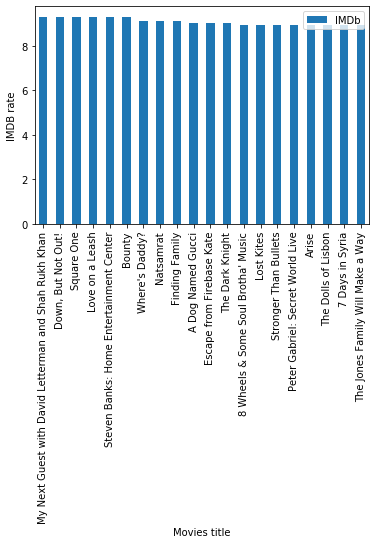

<Figure size 432x288 with 0 Axes>

In [125]:
# Create a bar chart based off of the group series from before
count_IMDB = top_IMDB_rating.plot(kind='bar',x = "Title", y= "IMDb")

# Set the xlabel and ylabel using class methods
count_IMDB.set_xlabel("Movies title")
count_IMDB.set_ylabel("IMDB rate")


plt.show()
plt.tight_layout()

### Top Directors

In [131]:
best_directors = cleand_file.groupby('Directors')['Title'].count().reset_index().rename(columns = {'Title':'Movie Count'}).sort_values('Movie Count',ascending = False).head(10)

In [132]:
fig = px.bar(best_directors, x='Directors', y='Movie Count', color='Movie Count', height=600)
fig.show()

## Histograms

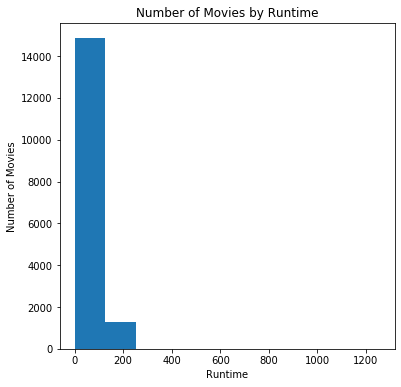

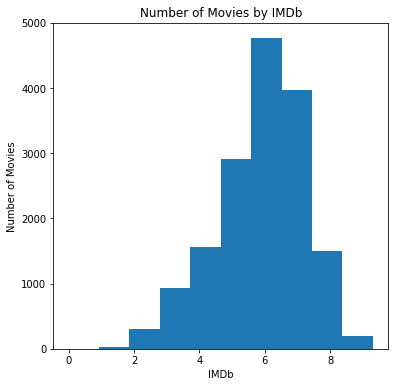

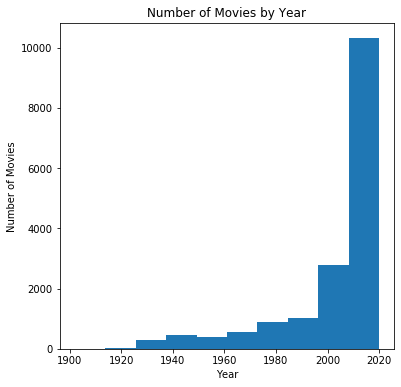

In [135]:
## let's check the distriution of the movies in different attributes
def plot_histogram(cleand_file, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize = (6,6)) # define the plt area
        ax = fig.gca()
        cleand_file[col].plot.hist(ax = ax, bins = bins)
        ax.set_title('Number of Movies by'+ ' '+ col)
        ax.set_xlabel(col)
        ax.set_ylabel("Number of Movies")
        plt.show()
num_cols = ['Runtime', 'IMDb',"Year"]    
plot_histogram(cleand_file, num_cols)

### Movies age distribution 

In [169]:
age_netflix = cleand_file.loc[cleand_file["Netflix"]==1].groupby(["Age", "Netflix"]).count()["ID"].reset_index()[["Age","ID"]].rename(columns = {"ID":"Count"})
age_netflix

,Age,Count
0,13+,383
1,16+,89
2,18+,752
3,7+,323
4,all,130


In [170]:
age_hulu = cleand_file.loc[cleand_file["Hulu"]==1].groupby(["Age", "Hulu"]).count()["ID"].reset_index()[["Age","ID"]].rename(columns = {"ID":"Count"})
age_hulu

,Age,Count
0,13+,119
1,16+,17
2,18+,290
3,7+,109
4,all,55


In [150]:
age_prime = cleand_file.loc[cleand_file["Prime Video"]==1].groupby(["Age", "Prime Video"]).count()["ID"].reset_index()[["Age","ID"]].rename(columns = {"ID":"Count"})
age_prime

,Age,Count
0,13+,819
1,16+,226
2,18+,2612
3,7+,916
4,all,406


In [151]:
age_disney = cleand_file.loc[cleand_file["Disney+"]==1].groupby(["Age", "Disney+"]).count()["ID"].reset_index()[["Age","ID"]].rename(columns = {"ID":"Count"})
age_disney

,Age,Count
0,13+,40
1,16+,1
2,18+,3
3,7+,179
4,all,277


In [173]:
pie = go.Pie(labels=age_netflix["Age"], values=age_netflix.Count, marker=dict(line=dict(color='#000000', width=1)))
layout = go.Layout(title='Netflix age movie distribution')
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)
# ------------------------------------------------
pie = go.Pie(labels=age_hulu["Age"], values=age_hulu.Count, marker=dict(line=dict(color='#000000', width=1)))
layout = go.Layout(title='Hulu age movie distribution')
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)
# ------------------------------------------------
pie = go.Pie(labels=age_disney["Age"], values=age_disney.Count, marker=dict(line=dict(color='#000000', width=1)))
layout = go.Layout(title='Disney age movie distribution')
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)
# ------------------------------------------------
pie = go.Pie(labels=age_prime["Age"], values=age_prime.Count, marker=dict(line=dict(color='#000000', width=1)))
layout = go.Layout(title='Prime Video age movie distribution')
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)